### Manuscript Figures for: Cryogenic Tune and Match Circuit for Magnetic Resonance Microscopy at 15.2T
### Author: Benjamim Michael Hardy
### 1/4/2023

In [2]:
# Imports:
from math import acos, ceil, cos, exp, floor, log10, pi, sin, sqrt, log
from operator import ior
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.interpolate import interp2d
# My class:
from coil import Coil
# fonts
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)

In [3]:
# Figure x: 
# Demonstrates the estimated SNR increase for a microsolenoid when immersed in Liquid Nitrogen

# Inputs: 
rho_s = 2 # ohm m, .5 S/m sample conductivity
sigma = 1/rho_s

f0 = 650e6 # resonant frequency (Hz)
n = 6 # number of turns
dwire = .0004 # wire diameter (m)
ts = 293 # sample temperature (K)
tsCold = 273.7 # cooled sample temperature if considering coooled sample (K)

# coil sizes:
nump = 1000 # number of points in x dim
dcoilSizes = np.linspace(.0005, .01, nump) # .5mm -> 10 mm coil size
lcoilSizes = 1.2*dcoilSizes # length of coil probably changes with coil diameter
# sample size
alphas = .8*dcoilSizes # sample diameter
betas = 5*lcoilSizes # sample length

# temperature stuff
rho_c = 1.68e-8 # room temp, resistivity of Cu (ohm m)
tc = 293 # temperature of coil (K)

rho_cCold = 1.8e-9 # resistivity of Cu at L N2 temps
tcCold = 77.4 # coil temp of L N2 (K)

snr1_rt = []
snr1_ct = []

for di in range(nump):
    # room temp
    cse = Coil(n, dcoilSizes[di], lcoilSizes[di], dwire, f0, rho_c, alphas[di], betas[di], sigma, tc, ts)
    snr1_rt.append(cse.getSNR())
    # L N2 temp
    cse = Coil(n, dcoilSizes[di], lcoilSizes[di], dwire, f0, rho_cCold, alphas[di], betas[di], sigma, tcCold, tsCold)
    snr1_ct.append(cse.getSNR())
    


(0.0, 3.0)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


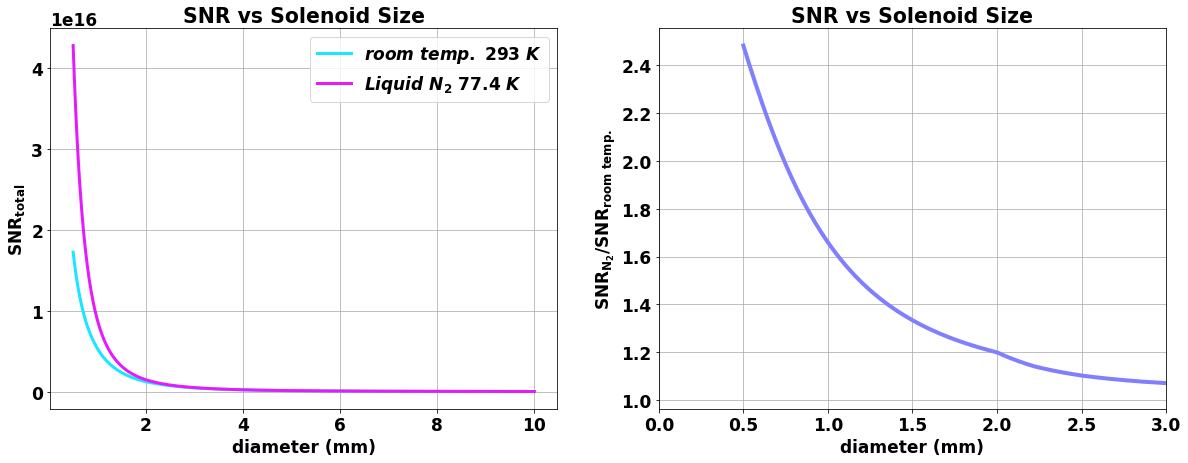

In [4]:
# plots:
col = plt.cm.cool([0.1,0.9,.5]) 
plt.subplots(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(dcoilSizes*1000, snr1_rt,linewidth=3,label=r'$room\ temp.\ 293\ K$',color=col[0])
plt.plot(dcoilSizes*1000, snr1_ct,linewidth=3,label=r'$Liquid\ N_2\ 77.4\ K$',color=col[1])

plt.xlabel('diameter (mm)',fontweight='bold')
plt.ylabel(r'$\bfSNR_{total}$',fontweight='bold')
plt.title('SNR vs Solenoid Size',fontweight='bold')
plt.grid()
legend_properties = {'weight':'normal'}

plt.legend(prop=legend_properties)

plt.subplot(1,2,2)
plt.plot(dcoilSizes*1000, np.divide(snr1_ct,snr1_rt),linewidth=4,color=col[2])
plt.grid()
plt.xlabel('diameter (mm)',fontweight='bold')
plt.ylabel(r'$\bfSNR_{N_2}/SNR_{room\ temp.}$',fontweight='bold')
plt.title('SNR vs Solenoid Size',fontweight='bold')
plt.xlim(0,3)